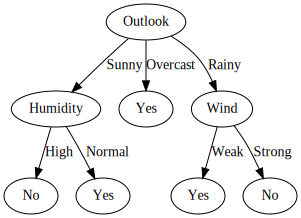

In [2]:
import pandas as pd
import numpy as np
import math
from graphviz import Digraph

def calculate_entropy(data, target_column):
    """Calculates the entropy of a dataset."""
    total_samples = len(data)
    class_counts = data[target_column].value_counts()
    entropy = 0
    for count in class_counts:
        probability = count / total_samples
        entropy -= probability * math.log2(probability)
    return entropy

def calculate_information_gain(data, feature, target_column):
    """Calculates the information gain of a feature."""
    total_samples = len(data)
    weighted_entropy = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        subset_entropy = calculate_entropy(subset, target_column)
        weighted_entropy += (len(subset) / total_samples) * subset_entropy
    return calculate_entropy(data, target_column) - weighted_entropy


def build_tree(data, target_column, features, parent_node_class=None):
    # Base cases
    if len(data[target_column].unique()) <= 1:
        return data[target_column].unique()[0]
    if len(features) == 0:
        return parent_node_class

    parent_node_class = data[target_column].mode()[0]  # Set mode of the target feature as parent node class

    # Find the best feature to split on
    best_feature = max(features, key=lambda feature: calculate_information_gain(data, feature, target_column))
    tree = {best_feature: {}}
    features.remove(best_feature) #Remove the feature that has been used already

    # Recursively build the tree
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        subtree = build_tree(subset, target_column, features.copy(), parent_node_class) #Create subtree recursively with current subset of data
        tree[best_feature][value] = subtree

    return tree


def visualize_tree(tree, dot=None, node_name='Root'):
    if not dot:
        dot = Digraph(comment='Decision Tree')

    if isinstance(tree, dict):
        feature = list(tree.keys())[0]
        dot.node(node_name, label=feature)

        for value, subtree in tree[feature].items():
            child_node_name = node_name + "_" + str(value)
            dot.edge(node_name, child_node_name, label=str(value))
            visualize_tree(subtree, dot, child_node_name)

    else:
        dot.node(node_name, label=str(tree))  # Leaf node

    return dot

# Sample data (Replace with your actual data)
data = {'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
        'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
        'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']}
df = pd.DataFrame(data)

target_column = 'PlayTennis'
features = list(df.columns)
features.remove(target_column)
tree = build_tree(df, target_column, features)
dot = visualize_tree(tree)
dot.render('decision_tree')
dot
